In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's consider the following Non-Linear Equation : 
$$ x^3 - 0.165x^2 + 3.993\times 10^{-4} = 0 $$
We will try to find its root using Bisection Method. Let's plot the function first

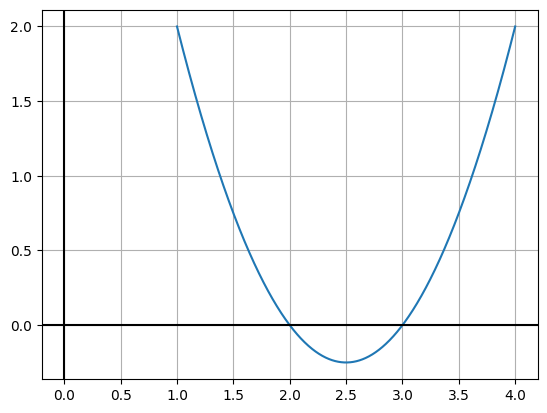

In [25]:
def non_linear_func(x):
    # return x**3 - 0.165*x**2 + 3.993*10**(-4)
    # return x**4 - 2*x**3 + x
    return x**2 - 5*x + 6

x = np.linspace(1, 4, 1000)
y = non_linear_func(x)

plt.plot(x, y)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid() 
plt.show()

In [32]:
def bisection(f, xl, xu, tol=0.05, maxiter=100):
    """Find root of scalar function f on interval [xl,xu].

    Parameters
    ----------
    f : function
        The function for which we are trying to find a root.
    xl, xu : numbers
        The interval in which to search for a root.
    tol : number
        The function returns when an interval [xl,xu] is found where
        abs(f(xm)) < tol where xm = (xl + xu)/2.
    maxiter : integer
        If the function exceeds maxiter iterations, then it will return None.

    Returns
    -------
    xm : number
        The x value of the approximate root
    iters : integer
        How many iterations were performed
    """

    iters = 0
    inf = 1e100
    xm_prev = None
    while iters < maxiter:
        xm = (xl + xu)/2
        if xm_prev is not None:
            arae = abs(xm - xm_prev) * 100 / xm
        else:
            arae = inf
        if f(xm) == 0 or arae < tol:
            return xm, iters
       
        iters += 1

        if f(xl)*f(xm) < 0:
            xu = xm
        else:
            xl = xm
        xm_prev = xm
    return None, iters

In [37]:
bisection(non_linear_func, -5, 3, 100)

(2.0, 2)

Let's modify the function to plot the $x_u$, $x_l$ and $x_m$ at each iteration.

In [29]:
def plot_bisection(f, x_u, x_l, x_m):
    x = np.linspace(-1, 2, 1000)
    y = f(x)

    plt.plot(x, y, 'b', label='f(x)', linewidth=3)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    # highlight the x_u, x_l, x_m
    plt.axvline(x=x_u, color='r', linestyle='--', label='x_u')
    plt.axvline(x=x_l, color='r', linestyle='--', label='x_l')
    plt.axvline(x=x_m, color='g', linestyle='--', label='x_m')
    plt.grid()
    plt.legend() 
    plt.show()

def bisection(f, xl, xu, tol=0.05, maxiter=100):
    iters = 0
    inf = 1e100
    xm_prev = None
    while iters < maxiter:
        xm = (xl + xu)/2

        plot_bisection(f, xu, xl, xm)

        if xm_prev is not None:
            arae = abs(xm - xm_prev) * 100 / xm
        else:
            arae = inf
        if f(xm) == 0 or arae < tol:
            return xm, iters
        iters += 1
        if f(xl)*f(xm) < 0:
            xu = xm
        else:
            xl = xm
        xm_prev = xm
    return None, iters

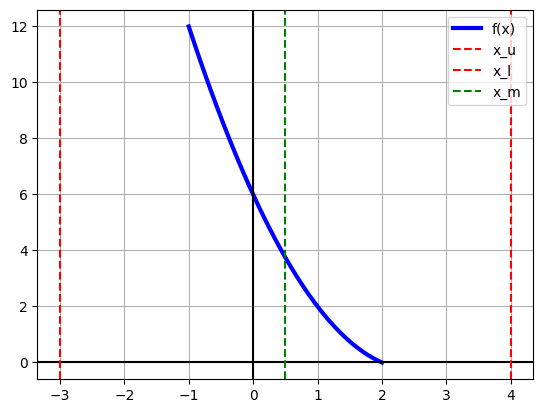

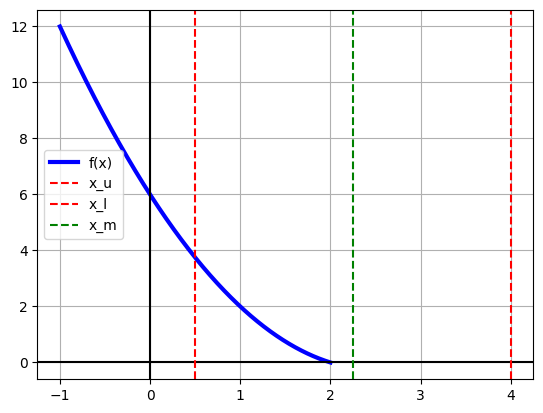

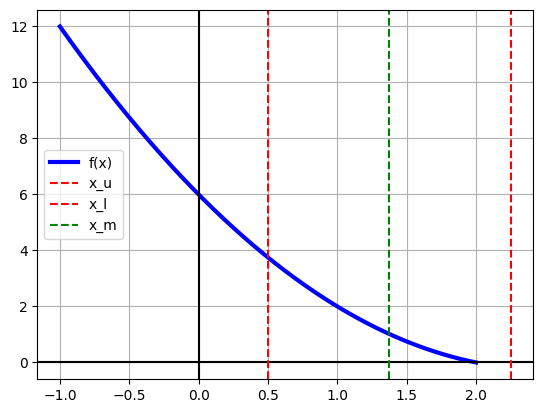

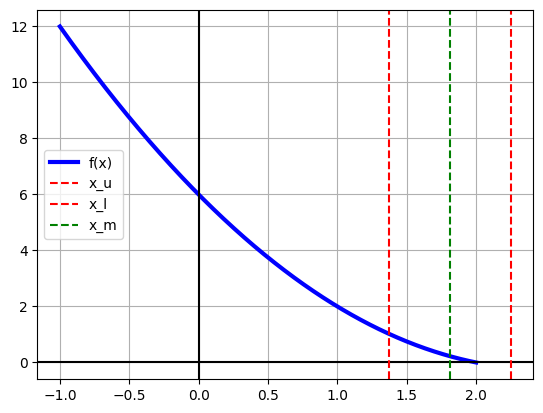

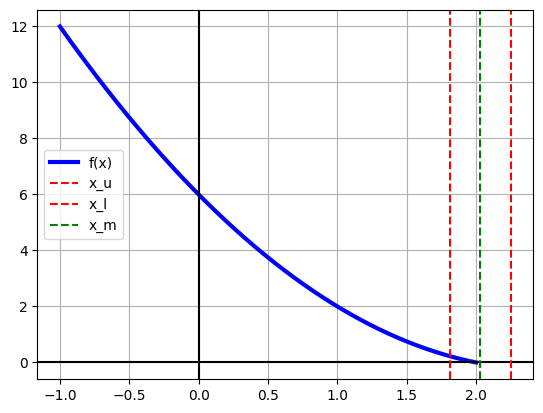

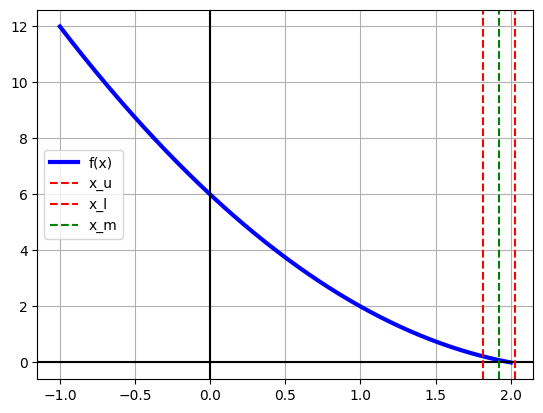

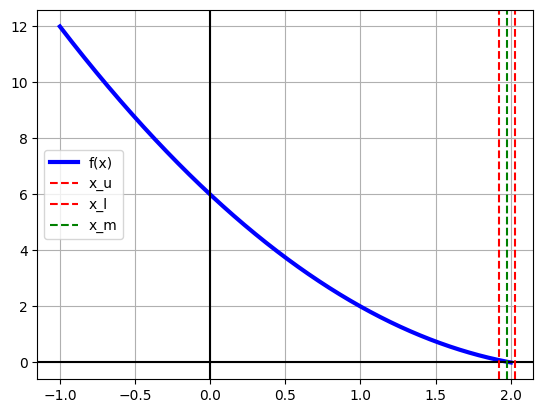

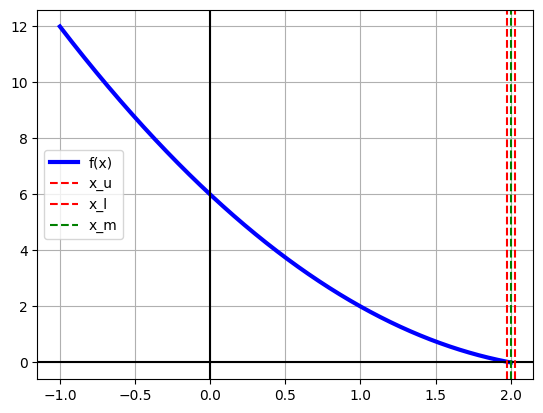

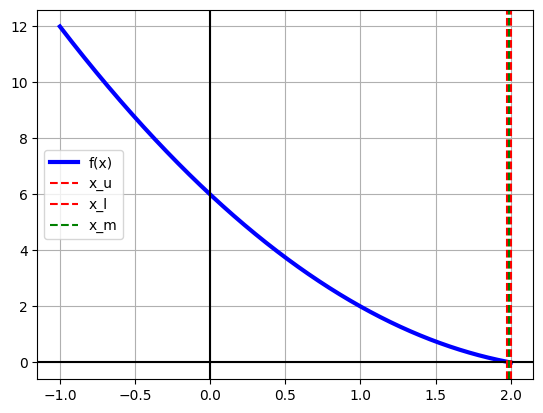

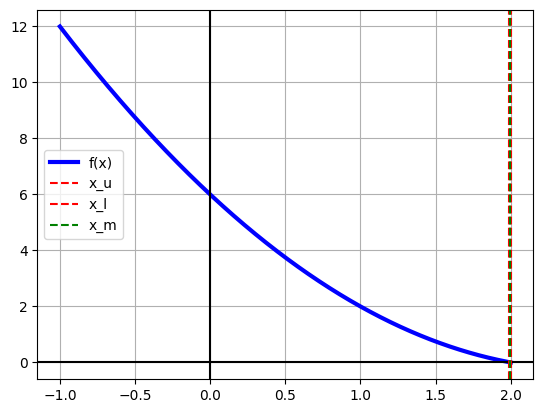

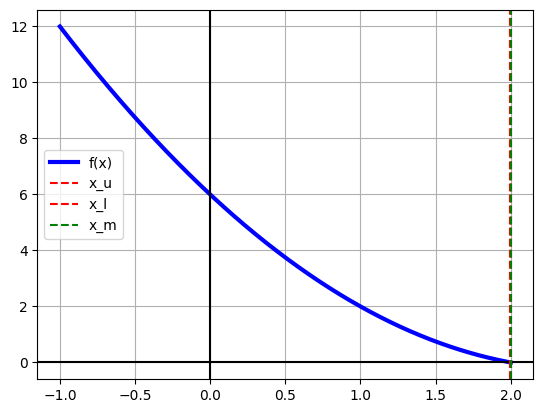

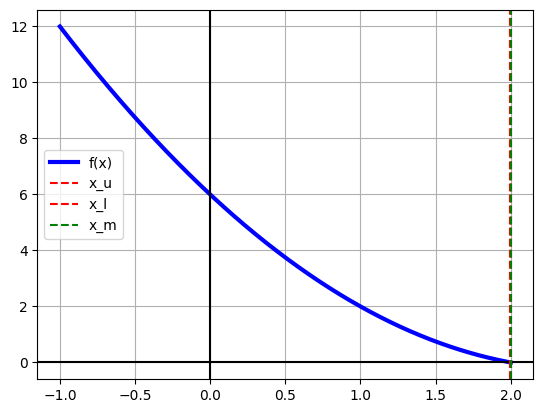

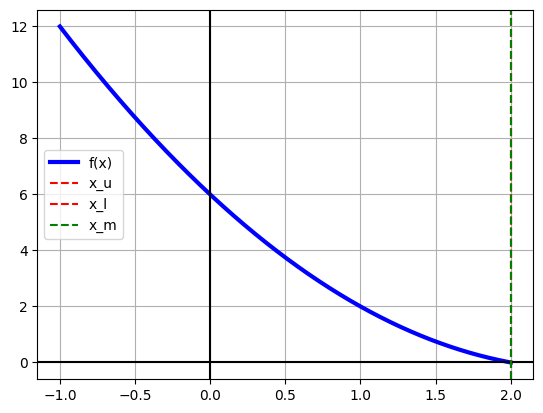

(1.9996337890625, 12)

In [30]:
bisection(non_linear_func, xl=-3, xu=4, tol=0.05, maxiter=1000)